In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv('projected_demand.csv')

In [4]:
print("Data Loaded:")
print(df.head())

Data Loaded:
   Year      Crop Consumer Trend  Population Growth Rate (%)  \
0  2020   Cabbage         Medium                         2.3   
1  2020   Spinach         Medium                         3.2   
2  2020   Carrots           High                         3.3   
3  2020    Onions         Medium                         2.8   
4  2020  Tomatoes            Low                         3.0   

   Economic Indicator (%)  Projected Demand (Tons)  
0                     3.2                     2500  
1                     2.5                     2606  
2                     2.6                     1325  
3                     3.8                     1665  
4                     2.8                     2271  


In [5]:


le = LabelEncoder()
df['Consumer Trend'] = le.fit_transform(df['Consumer Trend'])


X = df[['Population Growth Rate (%)', 'Economic Indicator (%)', 'Consumer Trend']]
y = df['Projected Demand (Tons)']


In [6]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [7]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



Mean Squared Error: 294624.44
R^2 Score: 0.01
                            Coefficient
Population Growth Rate (%)   -46.348876
Economic Indicator (%)       -40.952256
Consumer Trend                 5.050871


In [13]:

import matplotlib.pyplot as plt

import seaborn as sns


df = pd.read_csv('projected_demand.csv')


print("Data Loaded:")
print(df.head())


Data Loaded:
   Year      Crop Consumer Trend  Population Growth Rate (%)  \
0  2020   Cabbage         Medium                         2.3   
1  2020   Spinach         Medium                         3.2   
2  2020   Carrots           High                         3.3   
3  2020    Onions         Medium                         2.8   
4  2020  Tomatoes            Low                         3.0   

   Economic Indicator (%)  Projected Demand (Tons)  
0                     3.2                     2500  
1                     2.5                     2606  
2                     2.6                     1325  
3                     3.8                     1665  
4                     2.8                     2271  


In [14]:


le = LabelEncoder()
df['Consumer Trend'] = le.fit_transform(df['Consumer Trend'])


X = df[['Population Growth Rate (%)', 'Economic Indicator (%)', 'Consumer Trend']]
y = df['Projected Demand (Tons)']


<Figure size 1000x600 with 0 Axes>

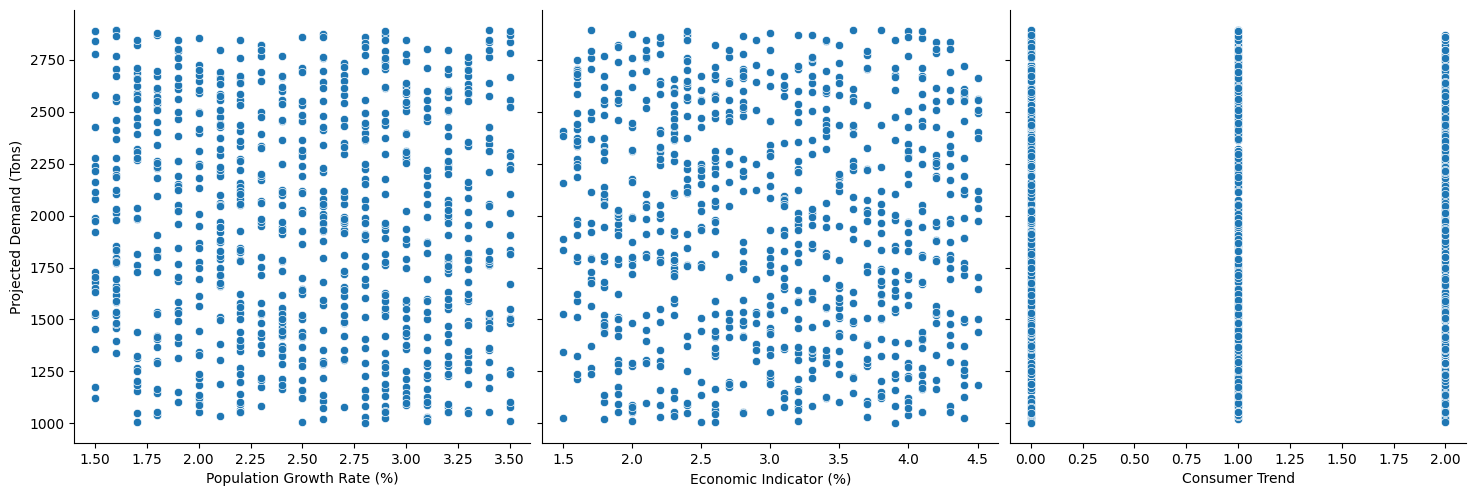

In [15]:

plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=['Population Growth Rate (%)', 'Economic Indicator (%)', 'Consumer Trend'], y_vars='Projected Demand (Tons)', height=5)
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [18]:

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


coefficients = pd.DataFrame(model.coef_, ['Population Growth Rate (%)', 'Economic Indicator (%)', 'Consumer Trend'], columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)



Mean Squared Error: 294624.44
R^2 Score: 0.01

Model Coefficients:
                            Coefficient
Population Growth Rate (%)   -26.903420
Economic Indicator (%)       -35.248988
Consumer Trend                 4.096527
